In [1]:
#sudo apt-get install python3-pandas
import pandas as pd
import numpy as np
import re
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display

#음원 중 특정 부분만 잘라내는 함수 #사용x
def split_wav(data, sample_rate, start, end):
    start *= sample_rate
    end *= sample_rate
    return data[start:end]


/usr/local/lib/python3.6/dist-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [13]:
path = '/home/ubuntu/DA'

file_list = os.listdir(path)
file_list

os.chdir('/home/ubuntu/DA/dataframe')

In [14]:
#빈 데이터프레임 생성
hiphop_df = pd.DataFrame(columns = ['song', 'genre'])
hiphop_df

#음원 데이터프레임 생성
hiphop_file_list = os.listdir(path+ '/' + 'hip-hop')

for i in range(len(hiphop_file_list)):
    hiphop_df = hiphop_df.append(pd.DataFrame([[hiphop_file_list[i], 'hip-hop']],
                                              columns = ['song', 'genre']),
                                 ignore_index = True)
        
print(hiphop_df)    

                                                 song    genre
0   SUPERBEE(수퍼비) - 수퍼비와 (Feat. BewhY) (Prod. Bewh...  hip-hop
1   창모 (CHANGMO), 해쉬스완 (Hash Swan), 애쉬 아일랜드 (ASH I...  hip-hop
2   프라이머리 - 독 (Feat. E Sens of 슈프림팀) 가사-QuC_EqHjA7...  hip-hop
3   기리보이, Kid Milli, NOEL, 스윙스 - flex (Prod.By 기리보...  hip-hop
4   슈퍼비 (SUPERBEE) - +82 Bars [Rap Legend]-1-sg3fu...  hip-hop
5   Jvcki Wai, 영비, Osshun Gum, 한요한 - 띵 (Prod.By 기리...  hip-hop
6                           창모 (CHANGMO) - METEOR.mp3  hip-hop
7                염따 - 돈 Call Me (Prod. by BRLLNT).mp3  hip-hop
8        HAON - 붕붕(Feat. Sik-K)(Prod. GroovyRoom).mp3  hip-hop
9                             창모 (CHANGMO) - 아름다워.mp3  hip-hop
10                        BTS (Suga) - First Love.mp3  hip-hop


In [15]:
#데이터프레임 갱신
for i in range(0,len(hiphop_file_list)):
        if hiphop_df.iloc[i,0] in hiphop_file_list == True:
            continue
        else: hiphop_df.append(pd.DataFrame([[hiphop_file_list[i], 'hip-hop']],
                                           columns = ['song', 'genre']),
                              ignore_index = True)
print(hiphop_df)        

                                                 song    genre
0   SUPERBEE(수퍼비) - 수퍼비와 (Feat. BewhY) (Prod. Bewh...  hip-hop
1   창모 (CHANGMO), 해쉬스완 (Hash Swan), 애쉬 아일랜드 (ASH I...  hip-hop
2   프라이머리 - 독 (Feat. E Sens of 슈프림팀) 가사-QuC_EqHjA7...  hip-hop
3   기리보이, Kid Milli, NOEL, 스윙스 - flex (Prod.By 기리보...  hip-hop
4   슈퍼비 (SUPERBEE) - +82 Bars [Rap Legend]-1-sg3fu...  hip-hop
5   Jvcki Wai, 영비, Osshun Gum, 한요한 - 띵 (Prod.By 기리...  hip-hop
6                           창모 (CHANGMO) - METEOR.mp3  hip-hop
7                염따 - 돈 Call Me (Prod. by BRLLNT).mp3  hip-hop
8        HAON - 붕붕(Feat. Sik-K)(Prod. GroovyRoom).mp3  hip-hop
9                             창모 (CHANGMO) - 아름다워.mp3  hip-hop
10                        BTS (Suga) - First Love.mp3  hip-hop


In [16]:
hiphop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
song     11 non-null object
genre    11 non-null object
dtypes: object(2)
memory usage: 256.0+ bytes


In [17]:
#title, genre 컬럼 생성
for i in range(len(hiphop_df)):
    hiphop_df['song'].iloc[i] = hiphop_df['song'].iloc[i].replace(' _ ', ' - ', 1)
    hiphop_df['song'].iloc[i] = hiphop_df['song'].iloc[i].replace('- ', ' - ', 1)
    hiphop_df['song'].iloc[i] = hiphop_df['song'].iloc[i].replace('[MV]', '', 1)
    
hiphop_df['singer'] = hiphop_df['song'].str.split(' - ').str[0]
print(hiphop_df['singer'], end = '\n--------------------------------------------\n')

hiphop_df['title'] = hiphop_df['song'].str.split(' - ').str[1]

for i in range(len(hiphop_df)):
    if hiphop_df['title'].str.contains('Feat|feat|Prod')[i] == True:
        continue
    else:
        hiphop_df['title'].iloc[i] = re.sub(r'\([^)]*\)', '', hiphop_df['title'].iloc[i])
        hiphop_df['title'] = hiphop_df['title'].str.split('.mp3').str[0] 
        #hiphop_df['title'] = hiphop_df['title'].str.split('-').str[0]
        hiphop_df['title'] = hiphop_df['title'].str.split('가사').str[0]
        hiphop_df['title'] = hiphop_df['title'].str.split('[').str[0] 
        hiphop_df['title'] = hiphop_df['title'].str.split('Official').str[0] 

print(hiphop_df['title'])

0                                        SUPERBEE(수퍼비) 
1     창모 (CHANGMO), 해쉬스완 (Hash Swan), 애쉬 아일랜드 (ASH I...
2                                                프라이머리 
3                           기리보이, Kid Milli, NOEL, 스윙스 
4                                       슈퍼비 (SUPERBEE) 
5                       Jvcki Wai, 영비, Osshun Gum, 한요한 
6                                         창모 (CHANGMO) 
7                                                   염따 
8                                                 HAON 
9                                         창모 (CHANGMO) 
10                                          BTS (Suga) 
Name: singer, dtype: object
--------------------------------------------
0     수퍼비와 (Feat. BewhY) (Prod. BewhY) 
1                                  BAND
2             독 (Feat. E Sens of 슈프림팀) 
3                   flex (Prod.By 기리보이)
4                             +82 Bars 
5                      띵 (Prod.By 기리보이)
6                                METEOR
7           돈 Call Me (Prod. by

In [18]:
#BPM 추출
bpm = []

for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 0, 60)
    tempo, _ = librosa.beat.beat_track(y, sr)
    bpm.append(tempo)
    
hiphop_df['tempo1'] = pd.DataFrame(bpm)

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [19]:
#BPM 추출
bpm = []

for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 60, 120)
    tempo, _ = librosa.beat.beat_track(y, sr)
    bpm.append(tempo)
    
hiphop_df['tempo2'] = pd.DataFrame(bpm)

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [20]:
#FT (푸리에 변환)
#시간 영역 데이터를 주파수 영역으로 변경
#y축: 주파수(로그 스케일)
#푸리에 변환을 한 후 곡 별산술통계량을 내어보자.

mean_ft = []
var_ft = []

for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 0, 60)
    D = np.abs(librosa.stft(y, n_fft = 2048, hop_length = 512))
    mean_D = np.mean(D)
    mean_ft.append(mean_D)
    var_D = np.var(D)
    var_ft.append(var_D)

hiphop_df['mean_ft1'] = pd.DataFrame(mean_ft)
hiphop_df['var_ft1'] = pd.DataFrame(var_ft)

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [21]:
#FT (푸리에 변환)
#시간 영역 데이터를 주파수 영역으로 변경
#y축: 주파수(로그 스케일)
#푸리에 변환을 한 후 곡 별산술통계량을 내어보자.

mean_ft = []
var_ft = []

for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 60, 120)
    D = np.abs(librosa.stft(y, n_fft = 2048, hop_length = 512))
    mean_D = np.mean(D)
    mean_ft.append(mean_D)
    var_D = np.var(D)
    var_ft.append(var_D)

hiphop_df['mean_ft2'] = pd.DataFrame(mean_ft)
hiphop_df['var_ft2'] = pd.DataFrame(var_ft)

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

<function matplotlib.pyplot.show(*args, **kw)>

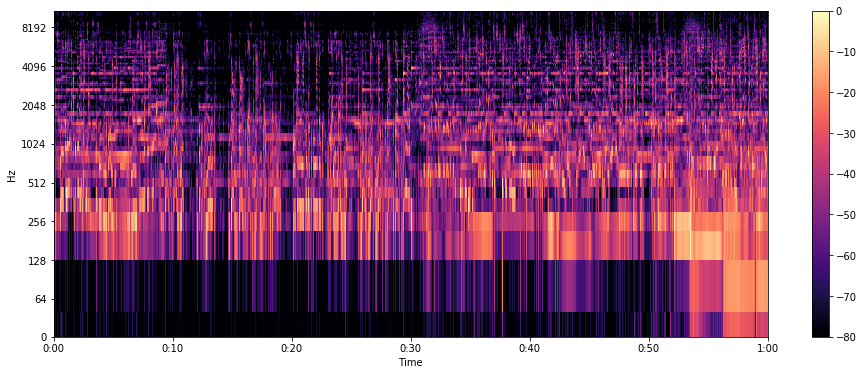

In [12]:
#Mel-Spectogram
s = librosa.feature.melspectrogram(y, sr)

s_DB = librosa.amplitude_to_db(s, ref = np.max)
s_DB
plt.figure(figsize = (16,6))
librosa.display.specshow(s_DB, sr=sr, hop_length = 512, x_axis = 'time', y_axis = 'log')
plt.colorbar()
plt.show

In [22]:
mean_mel = []
var_mel = []

for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 0, 60)
    s = librosa.feature.melspectrogram(y, sr)
    s_DB = librosa.amplitude_to_db(s, ref = np.max)
    mean_s_DB = np.mean(s_DB)
    mean_mel.append(mean_s_DB)
    var_s_DB = np.var(s_DB)
    var_mel.append(var_s_DB)

hiphop_df['mean_mel1'] = pd.DataFrame(mean_mel)
hiphop_df['var_mel1'] = pd.DataFrame(var_mel)


/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [23]:
mean_mel = []
var_mel = []

for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 60, 120)
    s = librosa.feature.melspectrogram(y, sr)
    s_DB = librosa.amplitude_to_db(s, ref = np.max)
    mean_s_DB = np.mean(s_DB)
    mean_mel.append(mean_s_DB)
    var_s_DB = np.var(s_DB)
    var_mel.append(var_s_DB)

hiphop_df['mean_mel2'] = pd.DataFrame(mean_mel)
hiphop_df['var_mel2'] = pd.DataFrame(var_mel)


/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [25]:
#Harmonic and Percussive components
#Harmonics: 사람의 귀로 구분할 수 없는 특징들 (음악의 색깔)
#음악의 색깔은 평균 추출
#Percussives: 리듬과 감정을 나타내는 충격파
#충격파는 min과 max를 추출
mean_h = []
var_h = []
mean_p = []
var_p = []
for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 0, 60)
    harm, perc = librosa.effects.hpss(y)
    mean_h.append(np.mean(harm))
    var_h.append(np.var(harm))
    mean_p.append(np.mean(perc))
    var_p.append(np.var(perc))

hiphop_df['mean_harm1'] = pd.DataFrame(mean_h)
hiphop_df['var_harm1'] = pd.DataFrame(var_h)
hiphop_df['mean_perc1'] = pd.DataFrame(mean_p)
hiphop_df['var_perc1'] = pd.DataFrame(var_p)
    

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [26]:
#Harmonic and Percussive components
#Harmonics: 사람의 귀로 구분할 수 없는 특징들 (음악의 색깔)
#음악의 색깔은 평균 추출
#Percussives: 리듬과 감정을 나타내는 충격파
#충격파는 min과 max를 추출
mean_h = []
var_h = []
mean_p = []
var_p = []
for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 60, 120)
    harm, perc = librosa.effects.hpss(y)
    mean_h.append(np.mean(harm))
    var_h.append(np.var(harm))
    mean_p.append(np.mean(perc))
    var_p.append(np.var(perc))

hiphop_df['mean_harm2'] = pd.DataFrame(mean_h)
hiphop_df['var_harm2'] = pd.DataFrame(var_h)
hiphop_df['mean_perc2'] = pd.DataFrame(mean_p)
hiphop_df['var_perc2'] = pd.DataFrame(var_p)
    

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [27]:
#Spectral Centroid: 주파수의 가중편균을 계산하여 소리의 무게중심이 어딘지를 알려주는 지표
import sklearn
def normalize(x, axis = 0):
    return sklearn.preprocessing.minmax_scale(x, axis = axis)

spectral_centroid_mean = []
spectral_centroid_var = []

for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 0, 60)
    sc = librosa.feature.spectral_centroid(y, sr)[0]
    spectral_centroid_mean.append(np.mean(normalize(sc)))
    spectral_centroid_var.append(np.var(normalize(sc)))

hiphop_df['mean_sc1'] = pd.DataFrame(spectral_centroid_mean)
hiphop_df['var_sc1'] = pd.DataFrame(spectral_centroid_var)  

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [28]:
#Spectral Centroid: 주파수의 가중편균을 계산하여 소리의 무게중심이 어딘지를 알려주는 지표
import sklearn
def normalize(x, axis = 0):
    return sklearn.preprocessing.minmax_scale(x, axis = axis)

spectral_centroid_mean = []
spectral_centroid_var = []

for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 60, 120)
    sc = librosa.feature.spectral_centroid(y, sr)[0]
    spectral_centroid_mean.append(np.mean(normalize(sc)))
    spectral_centroid_var.append(np.var(normalize(sc)))

hiphop_df['mean_sc2'] = pd.DataFrame(spectral_centroid_mean)
hiphop_df['var_sc2'] = pd.DataFrame(spectral_centroid_var)  

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [29]:
#Chroma Frequencies
#인간 청각이 옥타브 차이가 나는 주파수를 가진 두 음을 유사음으로 인지한다는 음악이론에 기반한다.
#모든 스펙트럼을 12개의 Bin(각기 다른 반음)으로 표현

mean_c = []
var_c = []

for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 0, 60)
    c = librosa.feature.chroma_stft(y, sr, hop_length = 512)
    mean_c.append(np.mean(c))
    var_c.append(np.var(c))
    
hiphop_df['mean_chroma1'] = pd.DataFrame(mean_c)
hiphop_df['var_chroma1'] = pd.DataFrame(var_c)


/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [30]:
#Chroma Frequencies
#인간 청각이 옥타브 차이가 나는 주파수를 가진 두 음을 유사음으로 인지한다는 음악이론에 기반한다.
#모든 스펙트럼을 12개의 Bin(각기 다른 반음)으로 표현

mean_c = []
var_c = []

for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 60, 120)
    c = librosa.feature.chroma_stft(y, sr, hop_length = 512)
    mean_c.append(np.mean(c))
    var_c.append(np.var(c))
    
hiphop_df['mean_chroma2'] = pd.DataFrame(mean_c)
hiphop_df['var_chroma2'] = pd.DataFrame(var_c)


/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [31]:
hiphop_df.to_csv('hiphop_df_semi.csv')

In [32]:
#MFCCs
#특징들의 작은 집합으로 스펙트럼 포곡선의 전체적인 모양을 축약해서 보여준다.
#사람의 청각 구조를 반영하여 음성 정보 추출

mean_m = []
var_m = []

for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 0, 60)
    mfccs = librosa.feature.mfcc(y, sr)
    mfccs = normalize(mfccs, axis = 1)
    mean_m.append(mfccs.mean())
    var_m.append(mfccs.var())
    
hiphop_df['mean_mfccs1'] = pd.DataFrame(mean_m)
hiphop_df['var_mfccs1'] = pd.DataFrame(var_m)

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [33]:
#MFCCs
#특징들의 작은 집합으로 스펙트럼 포곡선의 전체적인 모양을 축약해서 보여준다.
#사람의 청각 구조를 반영하여 음성 정보 추출

mean_m = []
var_m = []

for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 60, 120)
    mfccs = librosa.feature.mfcc(y, sr)
    mfccs = normalize(mfccs, axis = 1)
    mean_m.append(mfccs.mean())
    var_m.append(mfccs.var())
    
hiphop_df['mean_mfccs2'] = pd.DataFrame(mean_m)
hiphop_df['var_mfccs2'] = pd.DataFrame(var_m)

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [34]:
#zero crossing rate
zero_crossings_mean = []
zero_crossings_var = []

for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 0, 60)
    zc = librosa.zero_crossings(y, pad = False)
    zero_crossings_mean.append(np.mean(zc))
    zero_crossings_var.append(np.var(zc))

hiphop_df['zero_crossings_mean1'] = pd.DataFrame(zero_crossings_mean)    
hiphop_df['zero_crossings_var1'] = pd.DataFrame(zero_crossings_var)  

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [35]:
#zero crossing rate
zero_crossings_mean = []
zero_crossings_var = []

for i in range(len(hiphop_file_list)):
    y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hiphop_file_list[i])
    y = split_wav(y, sr, 60, 120)
    zc = librosa.zero_crossings(y, pad = False)
    zero_crossings_mean.append(np.mean(zc))
    zero_crossings_var.append(np.var(zc))

hiphop_df['zero_crossings_mean2'] = pd.DataFrame(zero_crossings_mean)    
hiphop_df['zero_crossings_var2'] = pd.DataFrame(zero_crossings_var)  

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [36]:
hiphop_df.to_csv('/home/ubuntu/DA/dataframe/hiphop_df.csv', index = False)

In [37]:
hiphop_df

,song,genre,singer,title,tempo1,tempo2,mean_ft1,var_ft1,mean_ft2,var_ft2,...,mean_chroma2,var_chroma2,mean_mfccs1,var_mfccs1,mean_mfccs2,var_mfccs2,zero_crossings_mean1,zero_crossings_var1,zero_crossings_mean2,zero_crossings_var2
0,SUPERBEE(수퍼비) - 수퍼비와 (Feat. BewhY) (Prod. Bew...,hip-hop,SUPERBEE(수퍼비),수퍼비와 (Feat. BewhY) (Prod. BewhY),123.046875,129.199219,1.227178,19.189520,3.011806,86.792618,...,0.432359,0.079885,0.498530,0.024028,0.525208,0.026717,0.102782,0.092218,0.072580,0.067312
1,"창모 (CHANGMO), 해쉬스완 (Hash Swan), 애쉬 아일랜드 (ASH I...",hip-hop,"창모 (CHANGMO), 해쉬스완 (Hash Swan), 애쉬 아일랜드 (ASH I...",BAND,143.554688,143.554688,1.584488,38.787117,1.821743,53.274967,...,0.449821,0.087220,0.495568,0.030664,0.485544,0.027042,0.133489,0.115670,0.109426,0.097452
2,프라이머리 - 독 (Feat. E Sens of 슈프림팀) 가사-QuC_EqHjA...,hip-hop,프라이머리,독 (Feat. E Sens of 슈프림팀),123.046875,161.499023,0.813000,6.426615,2.227214,34.692017,...,0.400975,0.087548,0.535094,0.025814,0.525777,0.025109,0.112842,0.100109,0.109339,0.097384
3,"기리보이, Kid Milli, NOEL, 스윙스 - flex (Prod.By 기리...",hip-hop,"기리보이, Kid Milli, NOEL, 스윙스",flex (Prod.By 기리보이),143.554688,143.554688,2.833221,58.805191,3.549314,75.695709,...,0.387571,0.096468,0.492628,0.027590,0.520792,0.024106,0.140459,0.120730,0.145143,0.124076
4,슈퍼비 (SUPERBEE) - +82 Bars [Rap Legend]-1-sg3f...,hip-hop,슈퍼비 (SUPERBEE),+82 Bars,143.554688,143.554688,2.738649,56.500713,3.197445,71.767365,...,0.437802,0.089384,0.516050,0.026590,0.535468,0.025338,0.148193,0.126232,0.138132,0.119052
5,"Jvcki Wai, 영비, Osshun Gum, 한요한 - 띵 (Prod.By 기...",hip-hop,"Jvcki Wai, 영비, Osshun Gum, 한요한",띵 (Prod.By 기리보이),151.999081,151.999081,2.888991,66.809517,2.880578,68.243256,...,0.401222,0.092088,0.497980,0.028102,0.517477,0.027733,0.137985,0.118945,0.138051,0.118993
6,창모 (CHANGMO) - METEOR.mp3,hip-hop,창모 (CHANGMO),METEOR,198.768029,92.285156,2.068098,62.016884,2.334960,64.199585,...,0.370477,0.091290,0.511420,0.025078,0.511615,0.026135,0.084757,0.077574,0.083686,0.076682
7,염따 - 돈 Call Me (Prod. by BRLLNT).mp3,hip-hop,염따,돈 Call Me (Prod. by BRLLNT),143.554688,143.554688,1.031868,16.224377,1.531164,26.249428,...,0.477183,0.085934,0.470123,0.029993,0.512111,0.025339,0.094384,0.085476,0.124519,0.109014
8,HAON - 붕붕(Feat. Sik-K)(Prod. GroovyRoom).mp3,hip-hop,HAON,붕붕(Feat. Sik-K)(Prod. GroovyRoom),135.999178,135.999178,2.197992,41.529274,2.561053,56.650082,...,0.358782,0.091428,0.527725,0.027724,0.506630,0.023878,0.102949,0.092351,0.110297,0.098132
9,창모 (CHANGMO) - 아름다워.mp3,hip-hop,창모 (CHANGMO),아름다워,89.102909,89.102909,1.656421,39.962025,2.000850,43.147022,...,0.353045,0.096009,0.507515,0.027134,0.509144,0.026110,0.083483,0.076514,0.105239,0.094164
